# Logistic Regression - Diabetes

In [47]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# Step 1: Problem Statement

# Step 2: Data Gathering

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# Step 3: Exploratory Data Analysis

In [3]:
df.info()                          # Checking all info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.isna().sum()          # Checking for missing values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['Outcome'].value_counts()            # Checking value counts of target column

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

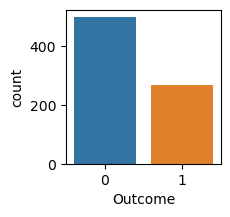

In [6]:
plt.figure(figsize= (2,2))
sns.countplot(x = df['Outcome'])

<AxesSubplot:>

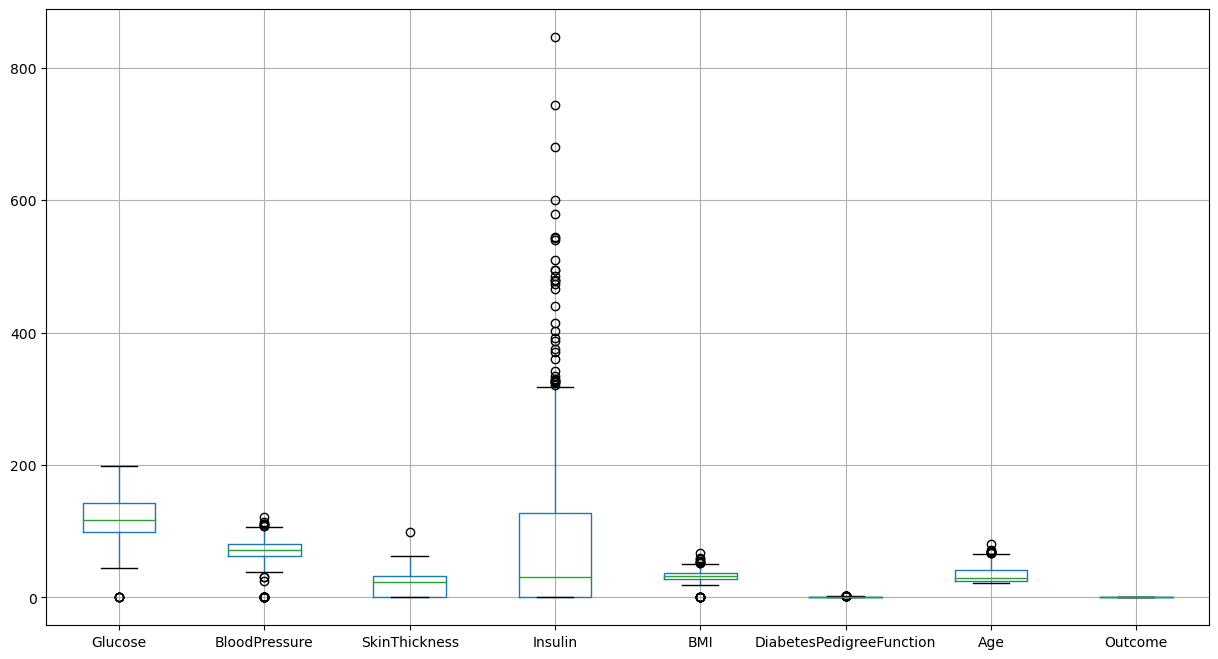

In [7]:
plt.figure(figsize= (15,8))
df.boxplot()            # Checking for outliers

# Step 4: Feature Engineering

### Imputation of the outliers

<AxesSubplot:xlabel='Glucose'>

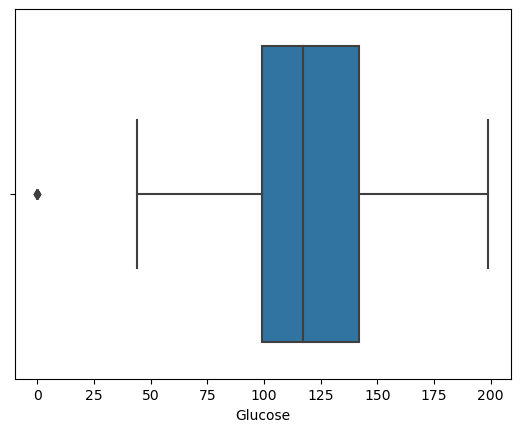

In [8]:
sns.boxplot(df['Glucose'])

In [9]:
## By using IQR method detecting the outliers
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.50)
q3 = df['Glucose'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['Glucose']].loc[df['Glucose'] <lower_tail]          # finding the actual rows

# Imputation of outliers with lower_tail values

df.loc[df['Glucose'] <lower_tail, 'Glucose'] = lower_tail  

df[['Glucose']].loc[df['Glucose'] <lower_tail]            # Rechecking for outliers

Q1 : 99.0
Q2 : 117.0
Q3 : 142.0
Upper_Tail:  206.5
Lower_Tail:  34.5


,Glucose


<AxesSubplot:xlabel='BloodPressure'>

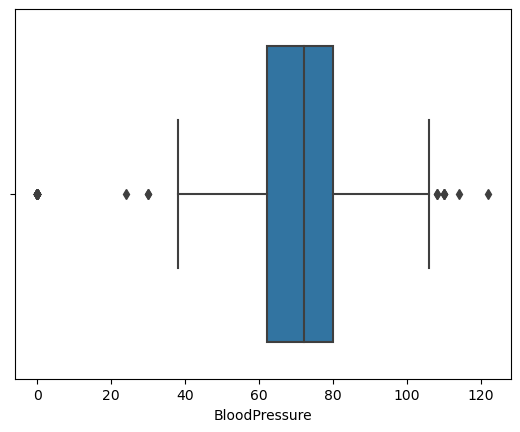

In [10]:
sns.boxplot(df['BloodPressure'])

In [11]:
## By using IQR method detecting the outliers
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['BloodPressure']].loc[(df['BloodPressure'] <lower_tail)|(df['BloodPressure'] > upper_tail)]   # finding the actual rows

# Imputation of outliers with lower_tail and upper tail values

df.loc[df['BloodPressure'] <lower_tail, 'BloodPressure'] = lower_tail 
df.loc[df['BloodPressure'] >upper_tail, 'BloodPressure'] = upper_tail

df[['BloodPressure']].loc[(df['BloodPressure'] <lower_tail)|(df['BloodPressure'] > upper_tail)]   # Rechecking for outliers

Q1 : 62.0
Q2 : 72.0
Q3 : 80.0
Upper_Tail:  107.0
Lower_Tail:  35.0


,BloodPressure


<AxesSubplot:xlabel='SkinThickness'>

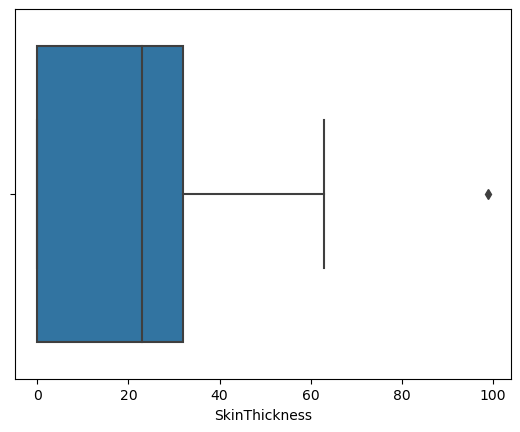

In [12]:
sns.boxplot(x = df['SkinThickness'])

In [13]:
## By using IQR method detecting the outliers
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['SkinThickness']].loc[df['SkinThickness'] > upper_tail]          # finding the actual rows

# Imputation of outliers with upper_tail values

df.loc[df['SkinThickness'] > upper_tail, 'SkinThickness'] = upper_tail  

df[['SkinThickness']].loc[df['SkinThickness'] > upper_tail]            # Rechecking for outliers

Q1 : 0.0
Q2 : 23.0
Q3 : 32.0
Upper_Tail:  80.0
Lower_Tail:  -48.0


,SkinThickness


<AxesSubplot:xlabel='Insulin'>

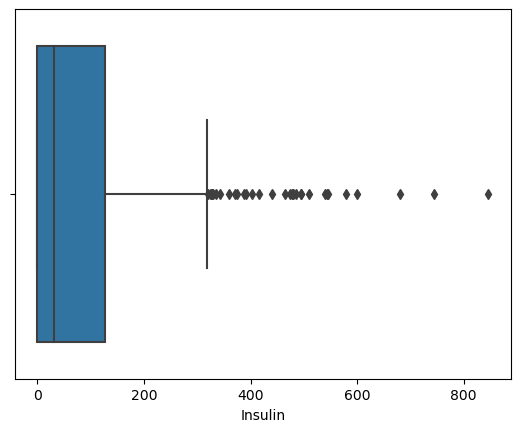

In [14]:
sns.boxplot(x = df['Insulin'])

In [15]:
## By using IQR method detecting the outliers
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['Insulin']].loc[df['Insulin'] > upper_tail]          # finding the actual rows

# Imputation of outliers with upper_tail values

df.loc[df['Insulin'] > upper_tail, 'Insulin'] = upper_tail  

df[['Insulin']].loc[df['Insulin'] > upper_tail]            # Rechecking for outliers

Q1 : 0.0
Q2 : 30.5
Q3 : 127.25
Upper_Tail:  318.125
Lower_Tail:  -190.875


,Insulin


<AxesSubplot:xlabel='BMI'>

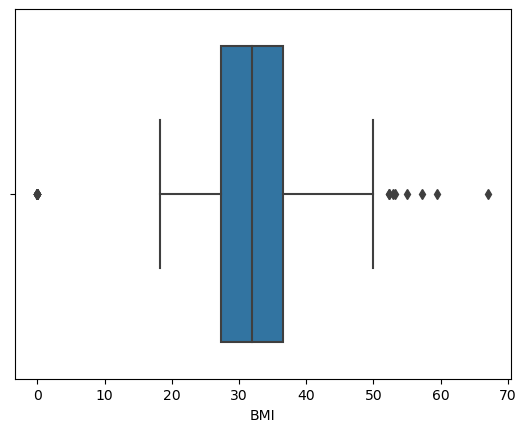

In [16]:
sns.boxplot(x = df['BMI'])

In [17]:
## By using IQR method detecting the outliers
q1 = df['BMI'].quantile(0.25)
q2 = df['BMI'].quantile(0.50)
q3 = df['BMI'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['BMI']].loc[(df['BMI'] <lower_tail)|(df['BMI'] > upper_tail)]   # finding the actual rows

# Imputation of outliers with lower_tail and upper tail values

df.loc[df['BMI'] <lower_tail, 'BMI'] = lower_tail 
df.loc[df['BMI'] >upper_tail, 'BMI'] = upper_tail

df[['BMI']].loc[(df['BMI'] <lower_tail)|(df['BMI'] > upper_tail)]   # Rechecking for outliers

Q1 : 27.3
Q2 : 32.0
Q3 : 36.6
Upper_Tail:  50.550000000000004
Lower_Tail:  13.35


,BMI


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

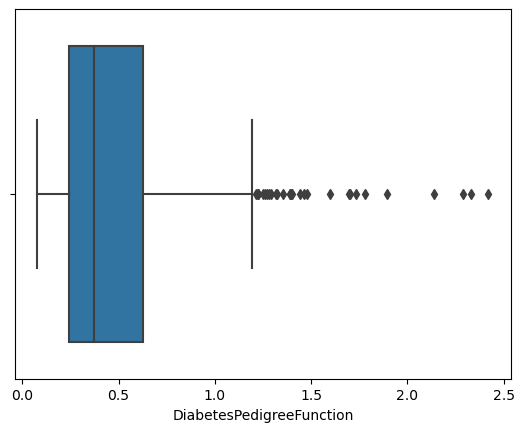

In [18]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [19]:
## By using IQR method detecting the outliers
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['DiabetesPedigreeFunction']].loc[df['DiabetesPedigreeFunction'] > upper_tail]          # finding the actual rows

# Imputation of outliers with upper_tail values

df.loc[df['DiabetesPedigreeFunction'] > upper_tail, 'DiabetesPedigreeFunction'] = upper_tail  

df[['DiabetesPedigreeFunction']].loc[df['DiabetesPedigreeFunction'] > upper_tail]            # Rechecking for outliers

Q1 : 0.24375
Q2 : 0.3725
Q3 : 0.62625
Upper_Tail:  1.2
Lower_Tail:  -0.32999999999999996


,DiabetesPedigreeFunction


<AxesSubplot:xlabel='Age'>

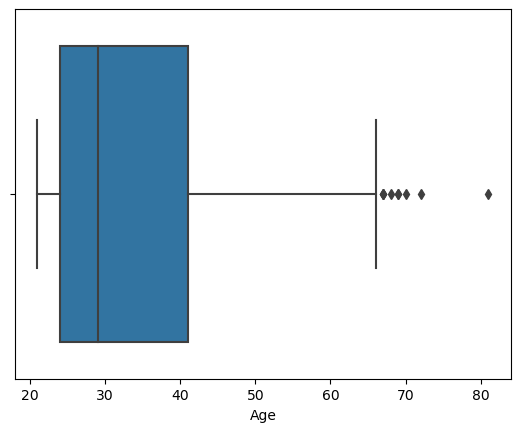

In [20]:
sns.boxplot(df['Age'])

In [21]:
## By using IQR method detecting the outliers
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Upper_Tail: ", upper_tail)
print("Lower_Tail: ", lower_tail)

df[['Age']].loc[df['Age'] > upper_tail]          # finding the actual rows

# Imputation of outliers with upper_tail values

df.loc[df['Age'] > upper_tail, 'Age'] = upper_tail  

df[['Age']].loc[df['Age'] > upper_tail]            # Rechecking for outliers

Q1 : 24.0
Q2 : 29.0
Q3 : 41.0
Upper_Tail:  66.5
Lower_Tail:  -1.5


,Age


# Step 5: Feature Selection

<AxesSubplot:>

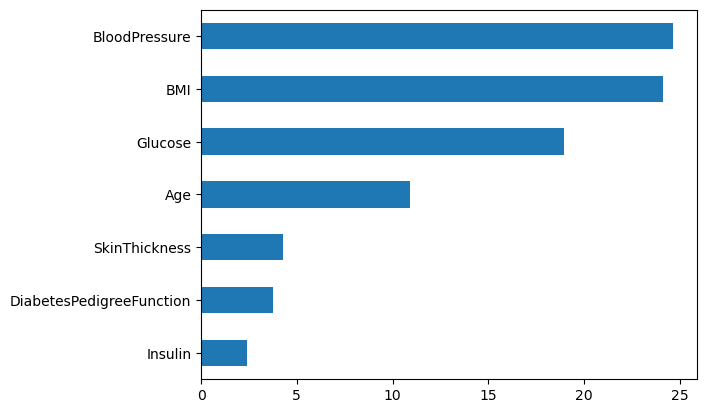

In [22]:
# Checking for multicolinearity

df1 = df.drop('Outcome', axis = 1)   # Getting dataframe of independent features
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1, i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = df1.columns)
s1.sort_values().plot(kind = 'barh')

# Step 6: Model Building

### Train Test Split

In [23]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9, stratify=y)

In [24]:
# Create an instance

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [27]:
# Training Accuracy
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[332  43]
 [ 84 117]]
*********************************************
Accuracy:  0.7795138888888888
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       375
           1       0.73      0.58      0.65       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [26]:
# testing Accuracy
y_pred = model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_pred, y_test)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[107  26]
 [ 18  41]]
*********************************************
Accuracy:  0.7708333333333334
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       133
           1       0.61      0.69      0.65        59

    accuracy                           0.77       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.78      0.77      0.77       192



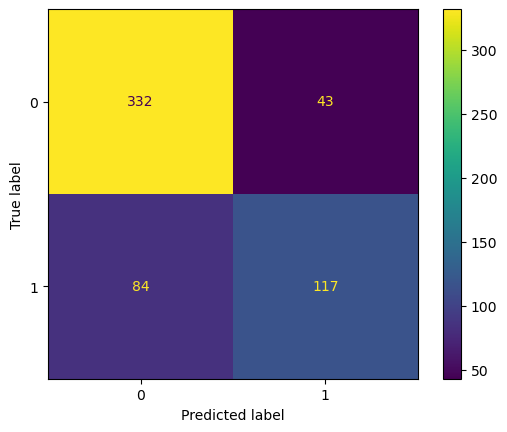

In [28]:
plot_confusion_matrix(model, x_train, y_train)

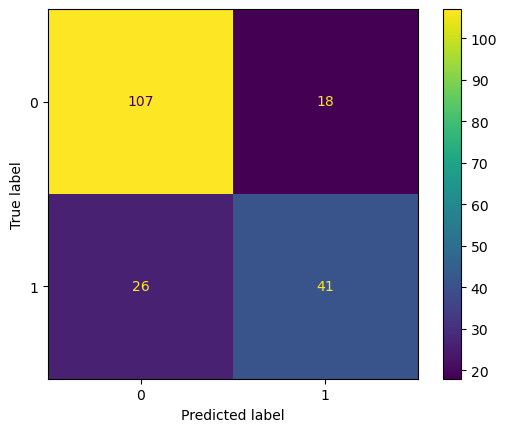

In [25]:
plot_confusion_matrix(model, x_test, y_test)

## AUC ROC Curve

In [29]:
y_pred_prob = model.predict_proba(x_train)   # Plot AUC- ROC curve on Training data
y_pred_prob[:,1]                            # to get class 1 values
 

fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

# print("FPR for class-1", fpr)
# print("TPR for class-1", tpr)
# print("Threshold for class-1", thresh)

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

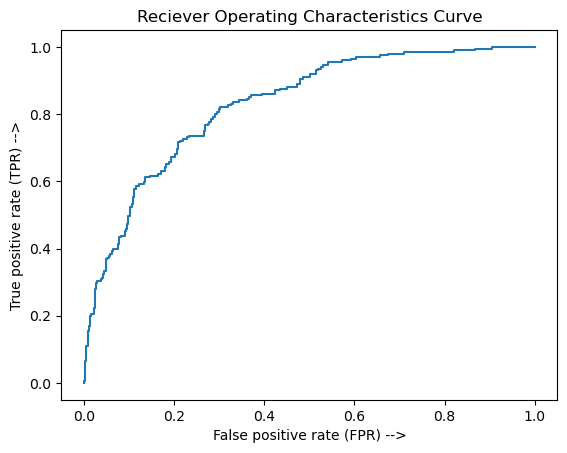

In [30]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [31]:
auc_value = auc(fpr, tpr)
auc_value

0.8295588723051409

## Create Pickle File

In [46]:
with open ("Logistic Regression.pkl", "wb") as f:
    pickle.dump(model, f)

## Creating json file

In [56]:
json_data = {"columns":list(x.columns)}
# len(json_data['columns'])

with open ("json_data.json", "w") as f:
    json.dump(json_data, f)


# Testing on Single User Input

In [34]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [36]:
# User entered values

Glucose = 130.000
BloodPressure = 60.000
SkinThickness = 37.000
Insulin = 0.000
BMI = 35.600
DiabetesPedigreeFunction = 0.71
Age = 48.000

In [39]:
# Creating arrays of zeros
test_array = np.zeros(x.shape[1], dtype = int)
# Assigning values to the array
test_array[0] = Glucose
test_array[1] = BloodPressure
test_array[2] = SkinThickness
test_array[3] = Insulin
test_array[4] = BMI
test_array[5] = DiabetesPedigreeFunction
test_array[6] = Age

test_array

array([130,  60,  37,   0,  35,   0,  48])

In [42]:
prediction = model.predict([test_array])[0]

if prediction == 1:
    print("The patient is diabetic")
else:
    print("The patient is not diabetic")

The patient is not diabetic
